# Data Mining (KEN4113) #
## Lab 4: Clustering ##

Konstantin Sandfort
i6255681

In [4]:
# Imports
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

## Assignment 1

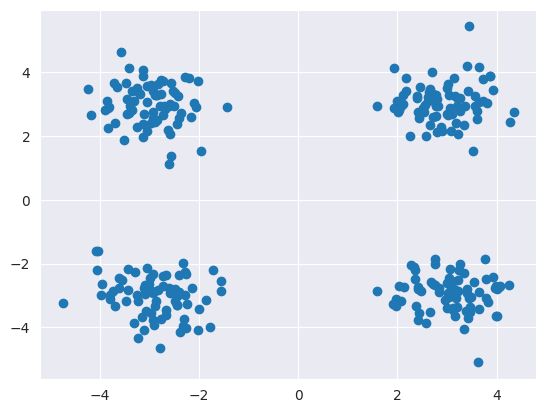

In [14]:
# (a) Data Generation

centers = [[-3, -3], [3, -3], [-3, 3], [3, 3]]
X, y = make_blobs(n_samples=300, centers=centers, cluster_std=0.6, random_state=None)
plt.scatter(X[:, 0], X[:, 1])

In [ ]:
# (b) K-Means clustering


## Assignment 2

## Assignment 3